### Read the Datasets

In [6]:
import pandas as pd

# Load the train and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Preview data
train_df.head()


,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


### Extract and focus on the essential columns for analysis


In [7]:
train_df = train_df.drop(columns=['model_a', 'model_b'])
test_df = test_df.drop(columns=['model_a', 'model_b'])

train_df.head()
# test_df.head()

,id,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [8]:
type(train_df['prompt'][0])

str

In [9]:
# Map the 'winner' columns to a single column with values 1, 2, or 3
def map_winner(row):
    if row['winner_model_a'] == 1:
        return 'model_a'  # Class 1 for Model A
    elif row['winner_model_b'] == 1:
        return 'model_b'  # Class 2 for Model B
    elif row['winner_tie'] == 1:
        return 'tie'  # Class 3 for Tie

# Apply the mapping function to create a single target column
train_df['winner_label'] = train_df.apply(map_winner, axis=1)

# Validate the transformation
train_df.head()

,id,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner_label
0,30192,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,model_a
1,53567,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,model_b
2,65089,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,tie
3,96401,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,model_a
4,198779,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,model_b


In [10]:
train_df = train_df.drop(columns=['winner_model_a', 'winner_model_b', 'winner_tie'])

In [11]:
train_df.head()

,id,prompt,response_a,response_b,winner_label
0,30192,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",model_a
1,53567,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",model_b
2,65089,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",tie
3,96401,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",model_a
4,198779,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",model_b


[chatgpt convo and suggested code](https://chatgpt.com/share/6794623e-a300-8012-a1ca-5a2b78183d9e)

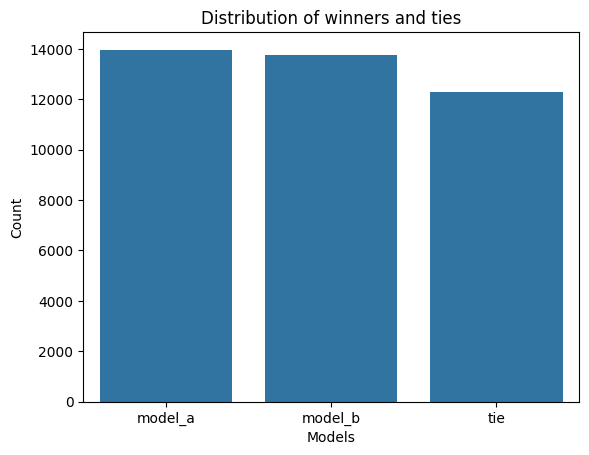

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='winner_label', data=train_df)
plt.title('Distribution of winners and ties')
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()

In [13]:
train_df['input_text'] = train_df['prompt'] + " [SEP] " + train_df['response_a'] + " [SEP] " + train_df['response_b']
test_df['input_text'] = test_df['prompt'] + " [SEP] " + test_df['response_a'] + " [SEP] " + test_df['response_b']

In [14]:
train_df.head()

,id,prompt,response_a,response_b,winner_label,input_text
0,30192,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",model_a,"[""Is it morally right to try to have a certain..."
1,53567,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",model_b,"[""What is the difference between marriage lice..."
2,65089,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",tie,"[""explain function calling. how would you call..."
3,96401,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",model_a,"[""How can I create a test set for a very rare ..."
4,198779,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",model_b,"[""What is the best way to travel from Tel-Aviv..."


In [15]:
train_df = train_df.drop(columns=['prompt', 'response_a', 'response_b'])

In [16]:
train_df.rename(columns={'input_text': 'text', 'winner_label': 'label_text'}, inplace=True)

# Map the 'label_text' to integers
label_mapping = {'model_a': 0, 'model_b': 1, 'tie': 2}
train_df['label'] = train_df['label_text'].map(label_mapping)
train_df.head()

,id,label_text,text,label
0,30192,model_a,"[""Is it morally right to try to have a certain...",0
1,53567,model_b,"[""What is the difference between marriage lice...",1
2,65089,tie,"[""explain function calling. how would you call...",2
3,96401,model_a,"[""How can I create a test set for a very rare ...",0
4,198779,model_b,"[""What is the best way to travel from Tel-Aviv...",1


In [17]:
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict

# Split the dataset into train, validation, and test sets
train_data, temp_data = train_test_split(train_df, test_size=0.5, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_data[['text', 'label', 'label_text']])
val_dataset = Dataset.from_pandas(val_data[['text', 'label', 'label_text']])
test_dataset = Dataset.from_pandas(test_data[['text', 'label', 'label_text']])

# Create a DatasetDict
main_dataset = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})


In [18]:
main_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 10000
    })
})

In [19]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
model = TFAutoModel.from_pretrained("bert-base-uncased")



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [20]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


The `AutoTokenizer` class in the Hugging Face Transformers library automatically retrieves the appropriate tokenizer for a given model, simplifying the process of loading the correct tokenizer by using the model's name or path.

### Key Functions:
1. **Automatic Selection**: Chooses the correct tokenizer class for a model.
2. **Ease of Use**: Simplifies loading tokenizers for different models.
3. **Consistency**: Ensures compatibility with the model.



### Documentation:
For more details, visit the [AutoTokenizer Documentation](https://huggingface.co/transformers/model_doc/auto.html#autotokenizer).








In [21]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [22]:
winners_encoded = main_dataset.map(tokenize, batched=True, batch_size=None)


Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [23]:
winners_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 10000
    })
})

In [24]:
winners_encoded.set_format('tf', 
                            columns=['input_ids', 'attention_mask', 'token_type_ids', 'label'])


In [25]:
BATCH_SIZE = 64

def order(inp):
    '''
    This function will group all the inputs of BERT
    into a single dictionary and then output it with
    labels.
    '''
    data = list(inp.values())
    return {
        'input_ids': data[1],
        'attention_mask': data[2],
        'token_type_ids': data[3]
    }, data[0]

# converting train split of `emotions_encoded` to tensorflow format
train_dataset = tf.data.Dataset.from_tensor_slices(winners_encoded['train'][:])
# set batch_size and shuffle
train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(1000)
# map the `order` function
train_dataset = train_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

# ... doing the same for test set ...
test_dataset = tf.data.Dataset.from_tensor_slices(winners_encoded['test'][:])
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)


In [26]:
inp, out = next(iter(train_dataset)) # a batch from train_dataset
print(inp, '\n\n', out)

{'input_ids': <tf.Tensor: shape=(64, 512), dtype=int64, numpy=
array([[ 101, 1031, 1000, ...,    0,    0,    0],
       [ 101, 1031, 1000, ..., 2064, 2022,  102],
       [ 101, 1031, 1000, ...,    0,    0,    0],
       ...,
       [ 101, 1031, 1000, ...,    0,    0,    0],
       [ 101, 1031, 1000, ..., 1050, 2629,  102],
       [ 101, 1031, 1000, ..., 2769, 2008,  102]], dtype=int64)>, 'attention_mask': <tf.Tensor: shape=(64, 512), dtype=int64, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)>, 'token_type_ids': <tf.Tensor: shape=(64, 512), dtype=int64, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)>} 

 tf.Tensor(
[2 2 0 0 2 2 1 2 0 1 

In [27]:
class BERTForClassification(tf.keras.Model):
    
    def __init__(self, bert_model, num_classes):
        super().__init__()
        self.bert = bert_model
        self.fc = tf.keras.layers.Dense(num_classes, activation='softmax')
        
    def call(self, inputs):
        x = self.bert(inputs)[1]
        return self.fc(x)

In [28]:
classifier = BERTForClassification(model, num_classes=6)

classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = classifier.fit(
    train_dataset,
    epochs=3
)

Epoch 1/3




The `datasets.arrow_dataset.Dataset` is a class from the Hugging Face `datasets` library. It represents a dataset in an efficient, memory-mapped format called Arrow. This class provides various methods to manipulate, transform, and access the dataset.

### Key Features:
1. **Efficient Storage**: Uses Apache Arrow for efficient data storage and access.
2. **Transformations**: Supports various data transformations like mapping, filtering, and shuffling.
3. **Interoperability**: Can be easily converted to other formats like Pandas DataFrames, NumPy arrays, and PyTorch tensors.



### Documentation:
For more detailed information, you can refer to the official documentation: [Hugging Face Datasets Documentation](https://huggingface.co/docs/datasets/package_reference/main_classes.html#datasets.Dataset).
